<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/latihan_ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Import Dataset

### Customer Demographics:

- customerID: Unique identifier for each customer
- gender: Male/Female
- SeniorCitizen: 0/1 (whether customer is 65+ years old)
- Partner: Yes/No (has a partner/spouse)
- Dependents: Yes/No (has dependents like children)

### Account Information:

- tenure: Number of months the customer has been with the company
- Contract: Month-to-month, One year, Two year
- PaperlessBilling: Yes/No (uses paperless billing)
- PaymentMethod: Electronic check, Mailed check, Bank transfer, Credit card

### Services:

- PhoneService: Yes/No (has phone service)
- MultipleLines: Yes/No/No phone service (multiple phone lines)
- InternetService: DSL, Fiber optic, No (type of internet)
- OnlineSecurity: Yes/No/No internet service (online security add-on)
- OnlineBackup: Yes/No/No internet service (online backup add-on)
- DeviceProtection: Yes/No/No internet service (device protection add-on)
- TechSupport: Yes/No/No internet service (tech support add-on)
- StreamingTV: Yes/No/No internet service (streaming TV service)
- StreamingMovies: Yes/No/No internet service (streaming movies service)

### Financial:

- MonthlyCharges: Monthly bill amount (numerical)
- TotalCharges: Total amount charged (numerical, sometimes stored as string)

### Target Variable:

- Churn: Yes/No (whether customer left the company)

In [2]:
df = pd.read_csv("churn_clean.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Mini EDA

1. Target Distribution → Check for class balance/imbalance
2. Missing Values Analysis & Handling:
    - Drop rows: if target variable is missing
    - Drop columns: if too many missing values (>50-70% missing)
    - Imputation strategies:
        - Numeric: mean, median, or mode
        - Categorical: most frequent (mode)
3. Feature Type Classification:
    - Identify numeric columns
    - Identify categorical columns

In [3]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [4]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
categorical_cols = [
    'gender',          # Male/Female
    'Partner',         # Yes/No
    'Dependents',      # Yes/No
    'PhoneService',    # Yes/No
    'MultipleLines',   # Yes/No/No phone service
    'InternetService', # DSL/Fiber optic/No
    'OnlineSecurity',  # Yes/No/No internet service
    'OnlineBackup',    # Yes/No/No internet service
    'DeviceProtection',# Yes/No/No internet service
    'TechSupport',     # Yes/No/No internet service
    'StreamingTV',     # Yes/No/No internet service
    'StreamingMovies', # Yes/No/No internet service
    'Contract',        # Month-to-month/One year/Two year
    'PaperlessBilling',# Yes/No
    'PaymentMethod',   # Electronic check/Mailed check/Bank transfer/Credit card
]

In [7]:
numeric_cols = [
    'SeniorCitizen',   # 0/1 (binary numeric)
    'tenure',          # Number of months
    'MonthlyCharges',  # Monthly bill amount
    'TotalCharges'     # Total amount charged
]

# Dataset Splitting

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["customerID", "Churn"])
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

# Feature Engineering

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder())
])

# Sama kayak diatas cuman diringkas
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numeric_cols),
    ('categoric', categorical_pipeline, categorical_cols),
])

# Training -> Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = pipeline
model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))

0.8046222222222222 0.8038379530916845


# Evaluation -> Logistic Regression

In [13]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [14]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4130
         Yes       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.80      0.80      5625



In [15]:
roc_auc_score(y_train.map({"No": 0, "Yes": 1}), pd.Series(y_train_pred).map({"No": 0, "Yes": 1}))

np.float64(0.723555920866164)

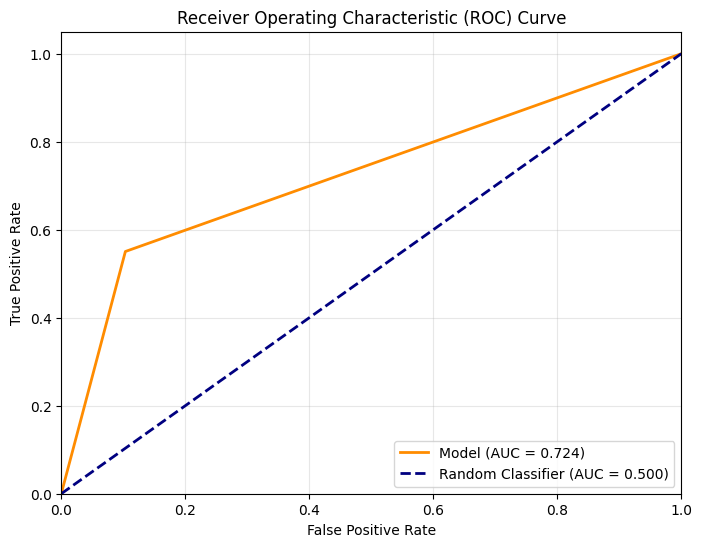

np.float64(0.723555920866164)

In [16]:
def plot_roc_auc(y_true, y_prob, model_name="Model"):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random Classifier (AUC = 0.500)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    return roc_auc

plot_roc_auc(
    y_train.map({"No": 0, "Yes": 1}),
    pd.Series(y_train_pred).map({"No": 0, "Yes": 1})
)

# How to Improve Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_estimators=100))
])

model = pipeline
model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9987555555555555 0.7860696517412935


## Hyper Parameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])
params = {
    "algo__n_estimators": [50, 100, 250],
    "algo__max_depth": [2, 4, 6, 8, 10],
    "algo__min_samples_split": [5, 15, 25]
}
model = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 45 candidates, totalling 135 fits


## Feature Importance

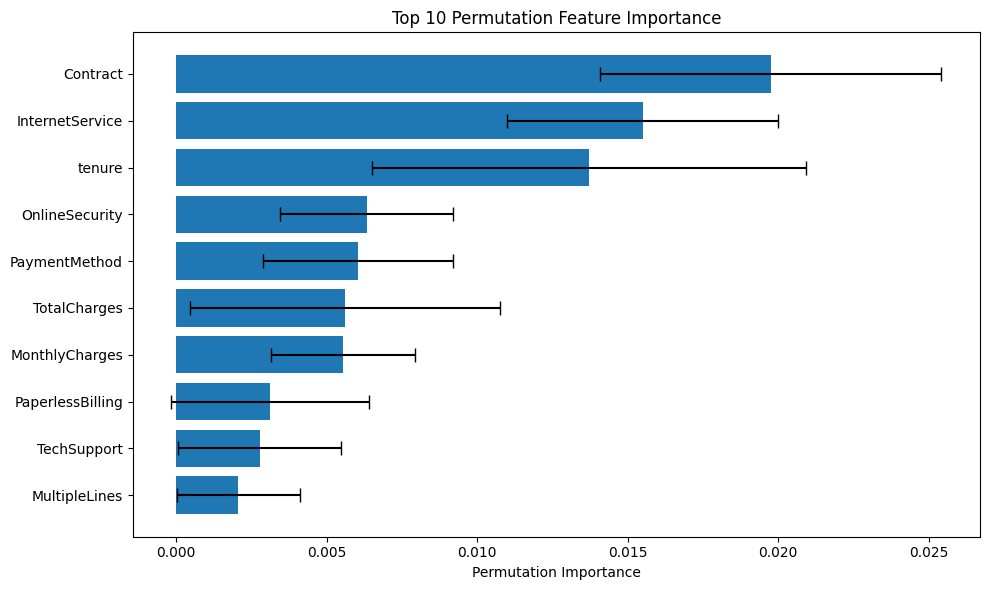

In [21]:
# Get feature importance with confidence intervals
from sklearn.inspection import permutation_importance

# Permutation importance (more reliable)
perm_importance = permutation_importance(model, X_test, y_test,
                                       n_repeats=10, random_state=42)

# Create DataFrame
perm_df = pd.DataFrame({
    'feature': model.feature_names_in_,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot with error bars
def plot_permutation_importance(perm_df, top_n=10):
    plt.figure(figsize=(10, 6))
    top_features = perm_df.head(top_n)

    plt.barh(range(len(top_features)), top_features['importance_mean'],
             xerr=top_features['importance_std'], capsize=5)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Permutation Importance')
    plt.title(f'Top {top_n} Permutation Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_permutation_importance(perm_df)

## Feature Selection

In [22]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder())
])

numeric_cols = [
    'tenure',          # Number of months
    'MonthlyCharges',  # Monthly bill amount
    'TotalCharges'     # Total amount charged
]

categorical_cols = [
    'Dependents',      # Yes/No
    'InternetService', # DSL/Fiber optic/No
    'OnlineSecurity',  # Yes/No/No internet service
    'TechSupport',     # Yes/No/No internet service
    'Contract',        # Month-to-month/One year/Two year
    'PaperlessBilling',# Yes/No
    'PaymentMethod',   # Electronic check/Mailed check/Bank transfer/Credit card
]

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numeric_cols),
    ('categoric', categorical_pipeline, categorical_cols),
])

In [23]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])
params = {
    "algo__n_estimators": [50, 100, 250],
    "algo__max_depth": [2, 4, 6, 8, 10],
    "algo__min_samples_split": [5, 15, 25]
}
model = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'algo__max_depth': 6, 'algo__min_samples_split': 25, 'algo__n_estimators': 250}
0.8144 0.7974413646055437


# Baseline and Benchmark

1. Baseline Performance: Your model must achieve greater than 0.73 accuracy, because based on your dataset, if we predict all rows as the majority class (no churn), we would get 0.73 accuracy as the baseline.
2. Competitive Benchmarking: Check competitor solutions, research papers, or other practitioners' work. For instance, you can review similar approaches on https://www.kaggle.com/datasets/blastchar/telco-customer-churn to see what performance levels others have achieved.
3. Domain Knowledge Integration: Apply domain expertise by focusing on the most important business-relevant features. We need to achieve higher performance by understanding which factors truly drive customer churn (e.g., contract length, payment methods, service usage patterns).

In [24]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [25]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


<Figure size 800x600 with 0 Axes>

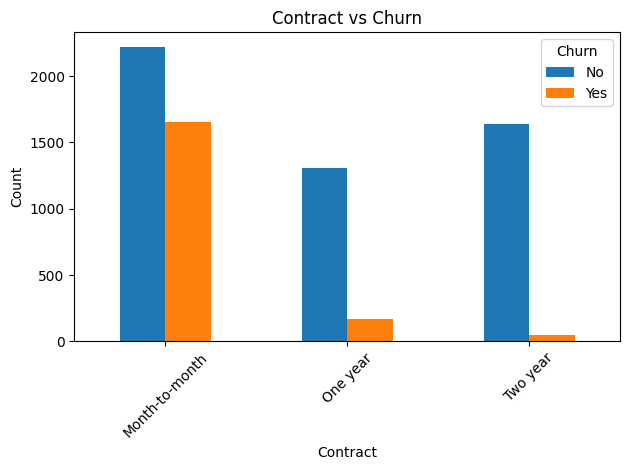

In [26]:
# Create crosstab
ct = pd.crosstab(df['Contract'], df['Churn'])

# Plot
plt.figure(figsize=(8, 6))
ct.plot(kind='bar')
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
X_test_copy = X_test["Contract"].copy()
preds = []
for row in X_test_copy:
    rand = np.random.rand()
    if row == "Month-to-month":
        if rand < 65: preds.append("No")
        else: preds.append("Yes")
    elif row == "One year":
        if rand < 0.9: preds.append("No")
        else: preds.append("Yes")
    elif row == "Two year":
        if rand < 0.98: preds.append("No")
        else: preds.append("Yes")
preds = np.array(preds)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7171286425017769